# IMPORTS

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder #encoding

from sklearn.model_selection import train_test_split #splitting dataset

from statsmodels.stats.outliers_influence import variance_inflation_factor #vif

# READING DATASETS

In [2]:
df = pd.read_excel("star_classification.xlsx")
print(df.shape)
cols = df.columns
print(cols)

(100000, 18)
Index(['obj_ID', 'alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'run_ID',
       'rerun_ID', 'cam_col', 'field_ID', 'spec_obj_ID', 'class', 'redshift',
       'plate', 'MJD', 'fiber_ID'],
      dtype='object')


# CLEANING DATASET

In [3]:
print(df.describe())

             obj_ID          alpha          delta              u  \
count  1.000000e+05  100000.000000  100000.000000  100000.000000   
mean   1.237665e+18     177.629117      24.135305      21.980468   
std    8.438560e+12      96.502241      19.644665      31.769291   
min    1.237646e+18       0.005528     -18.785328   -9999.000000   
25%    1.237659e+18     127.518222       5.146771      20.352353   
50%    1.237663e+18     180.900700      23.645922      22.179135   
75%    1.237668e+18     233.895005      39.901550      23.687440   
max    1.237681e+18     359.999810      83.000519      32.781390   

                   g              r              i              z  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean       20.531387      19.645762      19.084854      18.668810   
std        31.750292       1.854760       1.757895      31.728152   
min     -9999.000000       9.822070       9.469903   -9999.000000   
25%        18.965230      18.135828      1

In [4]:
nul = df.isnull().sum()
print("Total null values = ", nul)

Total null values =  obj_ID         0
alpha          0
delta          0
u              0
g              0
r              0
i              0
z              0
run_ID         0
rerun_ID       0
cam_col        0
field_ID       0
spec_obj_ID    0
class          0
redshift       0
plate          0
MJD            0
fiber_ID       0
dtype: int64


In [5]:
dupe = df.duplicated(subset=['spec_obj_ID']).sum()
print("Total duplicated values = ", dupe)

Total duplicated values =  0


In [6]:
class_count = df['class'].value_counts()
print(class_count)

class
GALAXY    59445
STAR      21594
QSO       18961
Name: count, dtype: int64


# ENCODING

In [7]:
cat_col = ['class']

label = LabelEncoder()
df['Output'] = label.fit_transform(df[cat_col])
print(df.shape)

df.drop(columns=['class'], inplace=True)
print(df.shape)
print(df.columns)

df.rename(columns = {'Output' : 'class'}, inplace = True)
print(df.shape)
print(df.columns)

(100000, 19)
(100000, 18)
Index(['obj_ID', 'alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'run_ID',
       'rerun_ID', 'cam_col', 'field_ID', 'spec_obj_ID', 'redshift', 'plate',
       'MJD', 'fiber_ID', 'Output'],
      dtype='object')
(100000, 18)
Index(['obj_ID', 'alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'run_ID',
       'rerun_ID', 'cam_col', 'field_ID', 'spec_obj_ID', 'redshift', 'plate',
       'MJD', 'fiber_ID', 'class'],
      dtype='object')


C:\Users\manog\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# HEATMAP

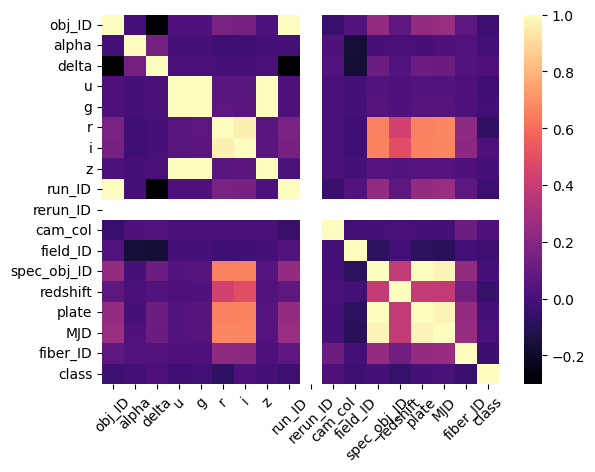

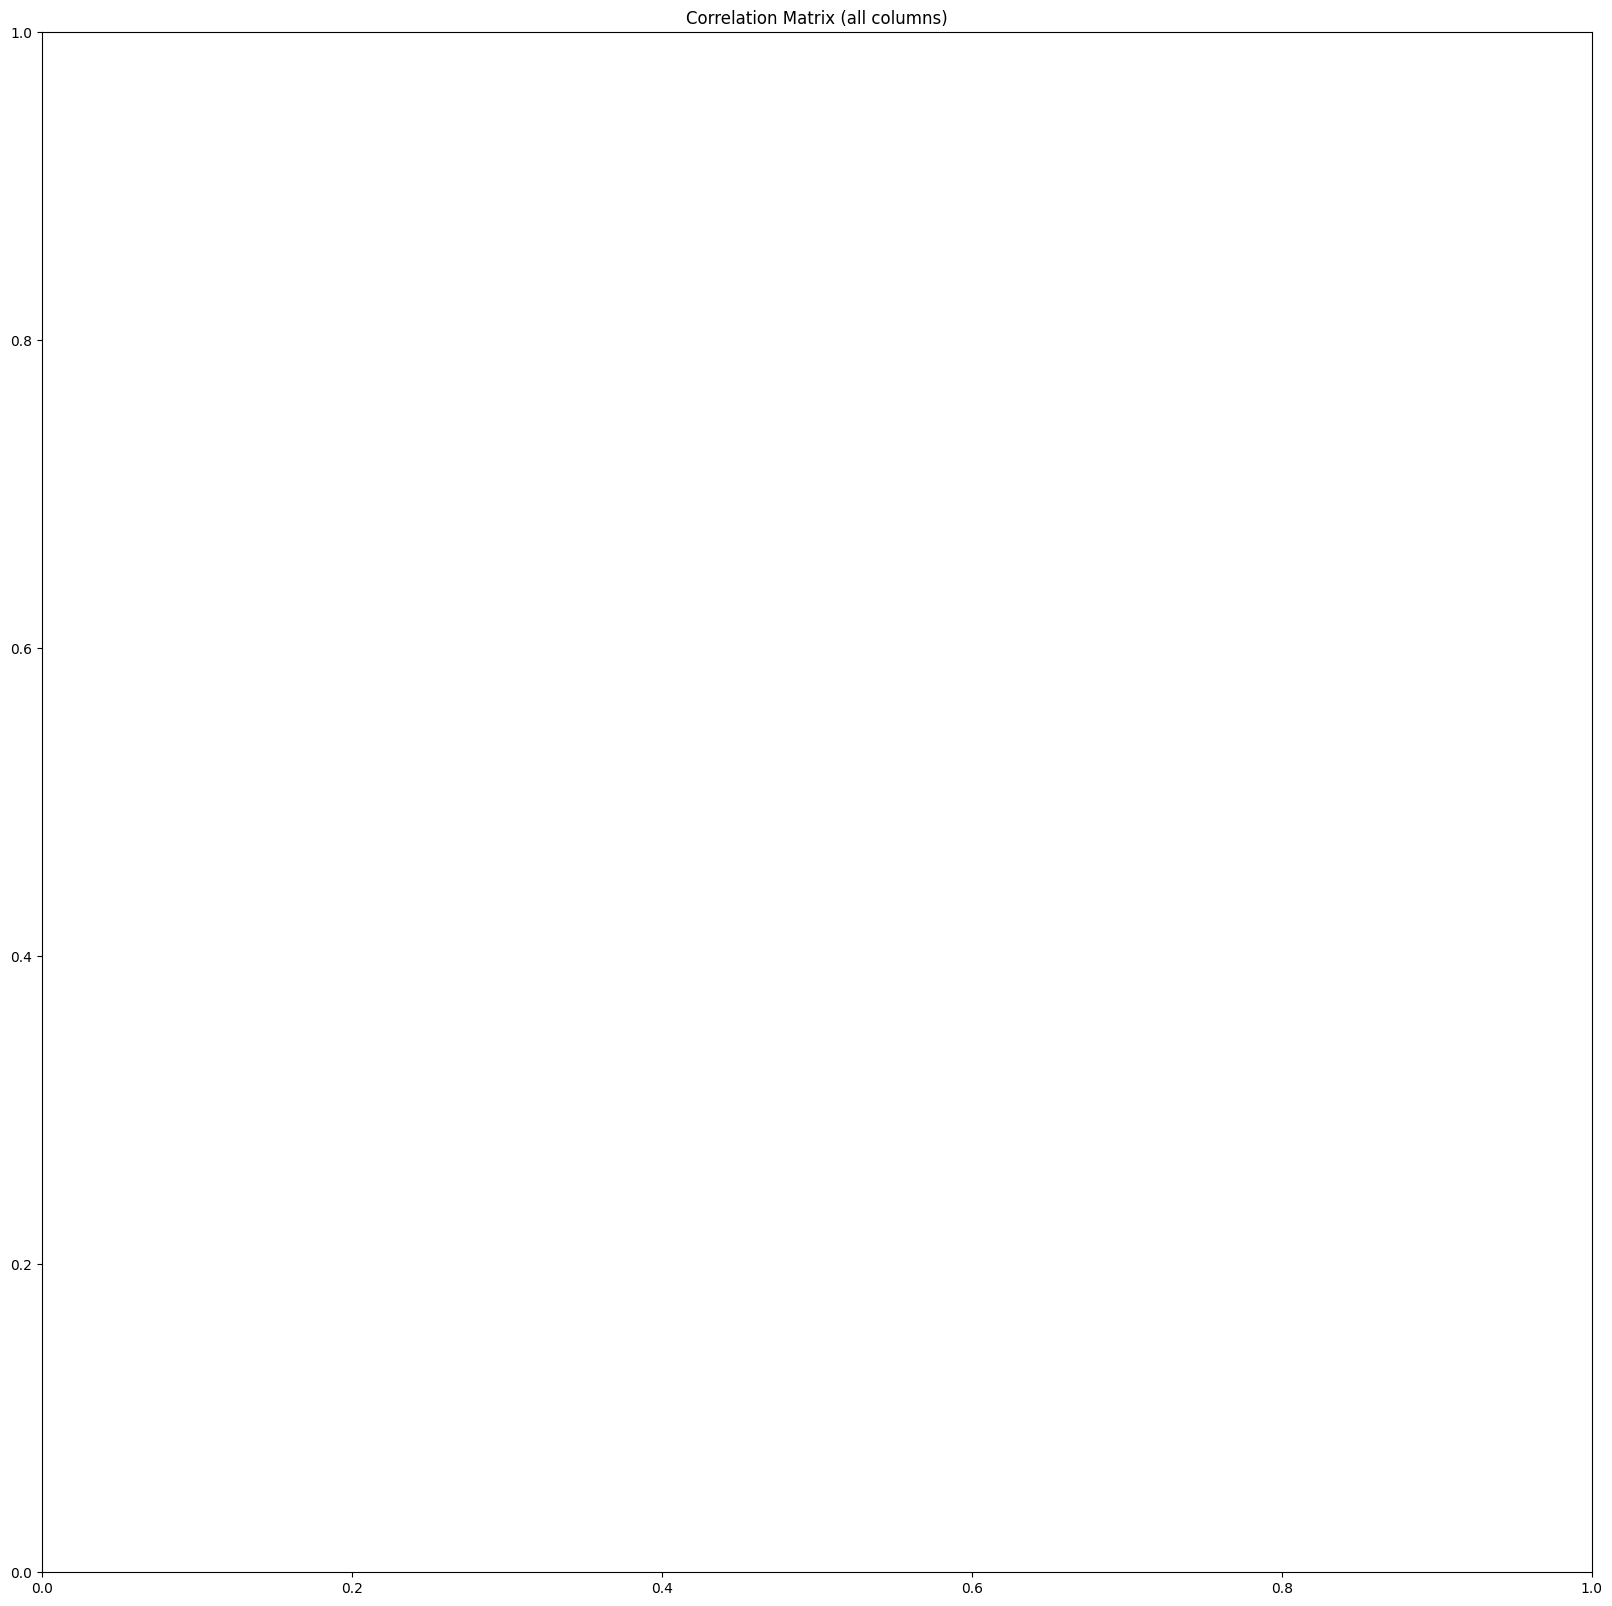

In [8]:
cor_mat = df.corr()

# Create heatmap
sns.heatmap(cor_mat, annot=False, cmap="magma")  # Annotate with values

# Customize labels and figure size
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.figure(figsize=(20, 20))  # Adjust size as desired
plt.title("Correlation Matrix (all columns)")
plt.show()


# SPLITTING DATASET

In [11]:
x = df.drop(['class'], axis=1)
y = df['class']

In [12]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x, y, test_size = 0.3, random_state = 1)
print(x1_train.shape, x1_test.shape)

x2_train, x2_test, y2_train, y2_test = train_test_split(x, y, test_size = 0.25, random_state = 1)
print(x2_train.shape, x2_test.shape)

x3_train, x3_test, y3_train, y3_test = train_test_split(x, y, test_size = 0.2, random_state = 1)
print(x2_train.shape, x2_test.shape)

x4_train, x4_test, y4_train, y4_test = train_test_split(x, y, test_size = 0.15, random_state = 1)
print(x2_train.shape, x2_test.shape)

(70000, 17) (30000, 17)
(75000, 17) (25000, 17)
(75000, 17) (25000, 17)
(75000, 17) (25000, 17)


DATA BALANCING

In [13]:
from imblearn.over_sampling import SMOTE

# Applying SMOTE
smote = SMOTE()

x1_train_resampled, y1_train_resampled = smote.fit_resample(x1_train, y1_train)
class1_weights = dict(zip([0,1], [(len(y1_train_resampled) - sum(y1_train_resampled)) / len(y1_train_resampled), 
                                  sum(y1_train_resampled) / len(y1_train_resampled)]))

x2_train_resampled, y2_train_resampled = smote.fit_resample(x2_train, y2_train)
class2_weights = dict(zip([0,1], [(len(y2_train_resampled) - sum(y2_train_resampled)) / len(y2_train_resampled), 
                                  sum(y2_train_resampled) / len(y2_train_resampled)]))

x3_train_resampled, y3_train_resampled = smote.fit_resample(x3_train, y3_train)
class3_weights = dict(zip([0,1], [(len(y3_train_resampled) - sum(y3_train_resampled)) / len(y3_train_resampled), 
                                  sum(y3_train_resampled) / len(y3_train_resampled)]))

x4_train_resampled, y4_train_resampled = smote.fit_resample(x4_train, y4_train)
class4_weights = dict(zip([0,1], [(len(y4_train_resampled) - sum(y4_train_resampled)) / len(y4_train_resampled), 
                                  sum(y4_train_resampled) / len(y4_train_resampled)]))

# GRAPHS AND PLOTS

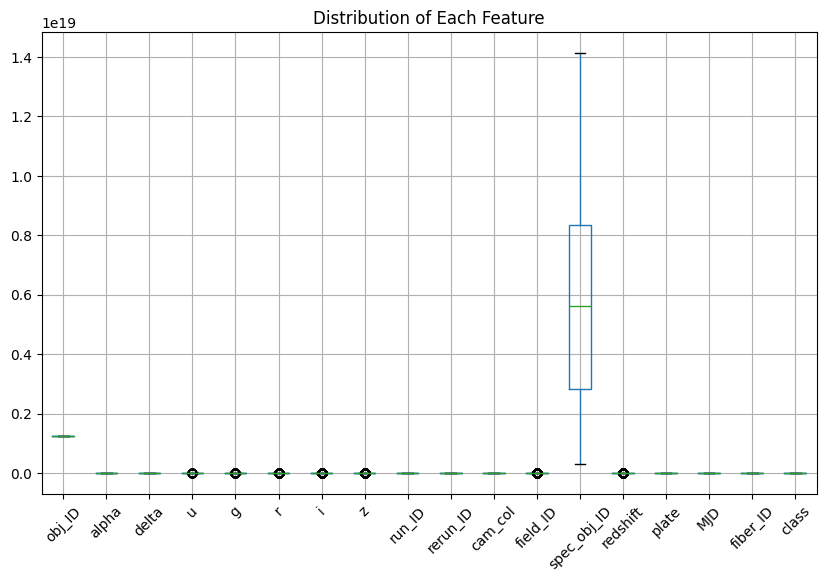

In [12]:
plt.figure(figsize = (10,6))

df.boxplot()

plt.xticks(rotation=45)
plt.title("Distribution of Each Feature")
plt.show()

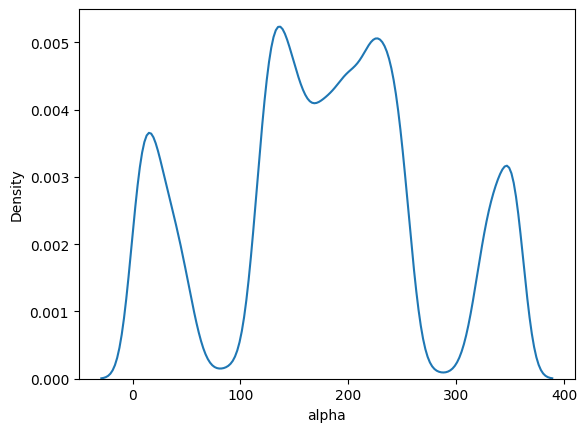

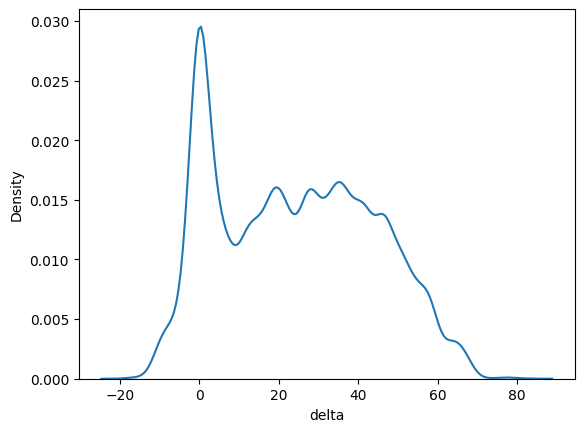

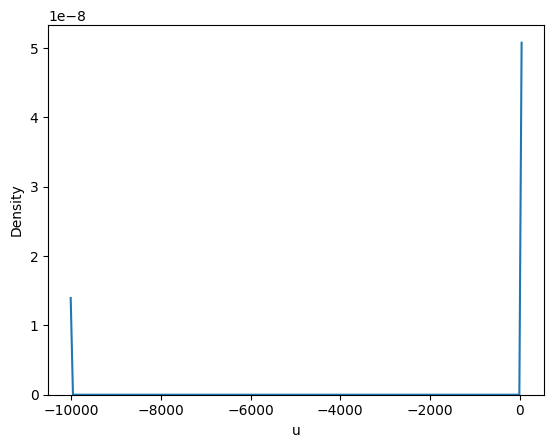

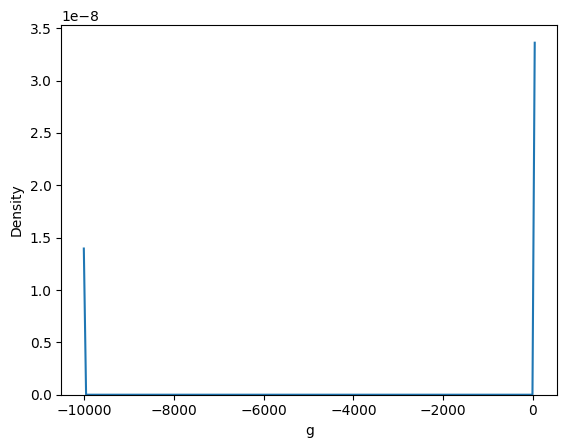

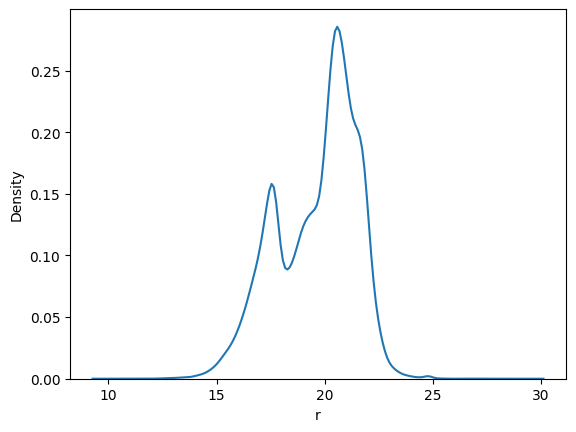

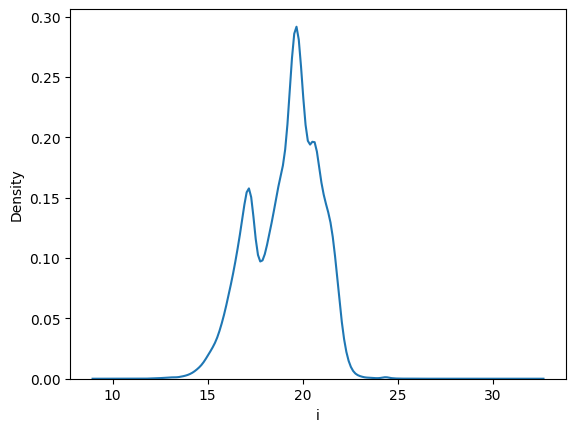

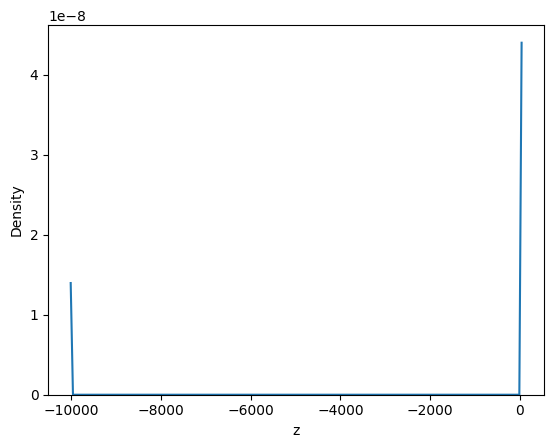

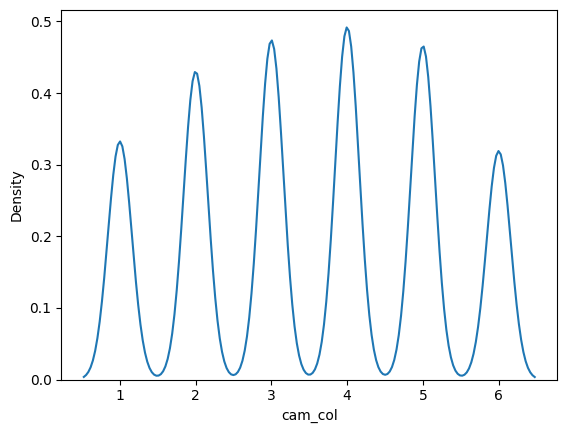

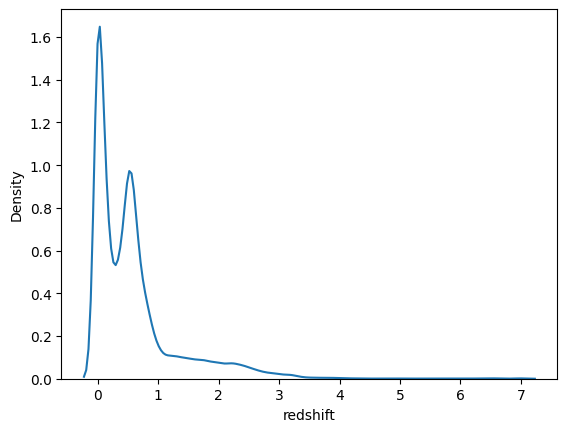

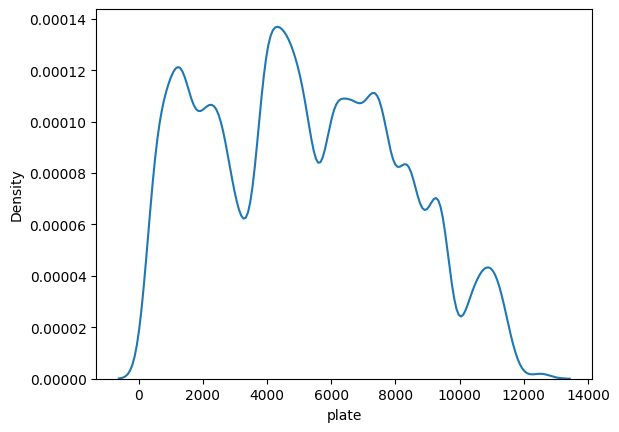

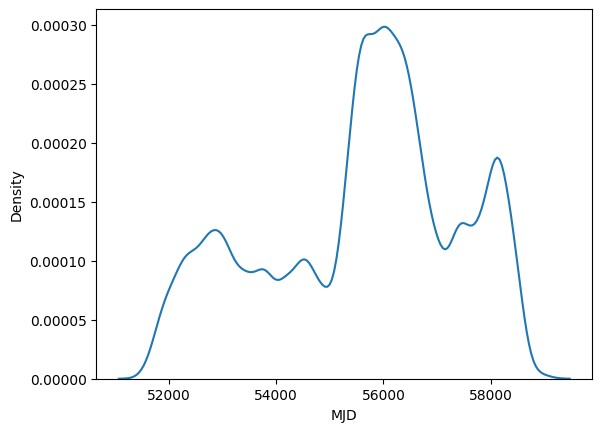

In [20]:
num_cols = ['alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'cam_col', 'redshift', 'plate', 'MJD']

for feature in num_cols:
  sns.kdeplot(df[feature])  # Kernel Density Estimation for smooth density plots
  plt.xlabel(feature)  # Optional: Label for X-axis
  plt.ylabel("Density")  # Label for Y-axis
  plt.show()

alpha


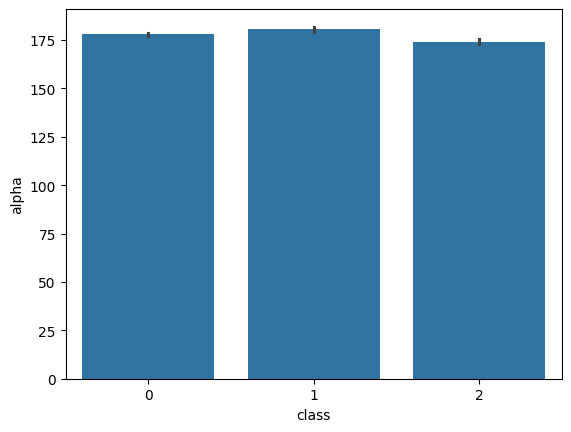

delta


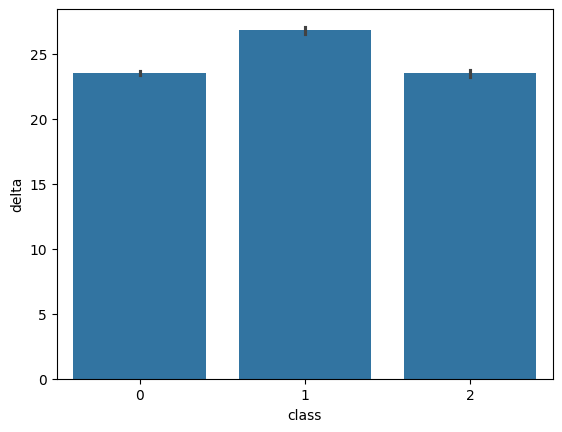

u


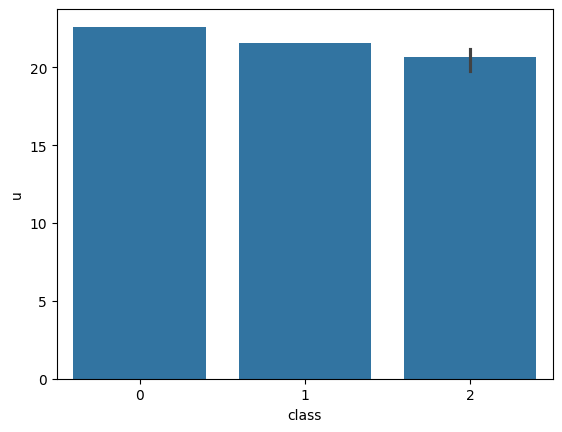

g


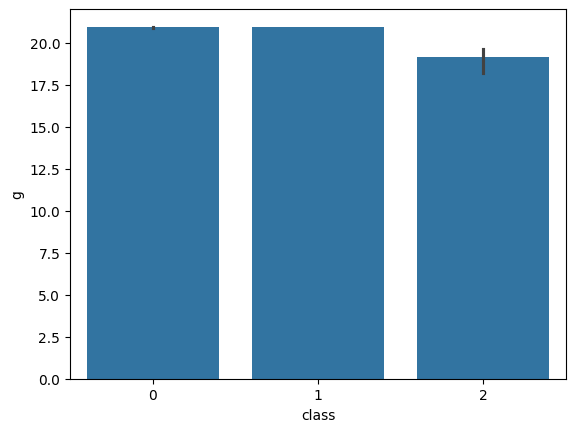

r


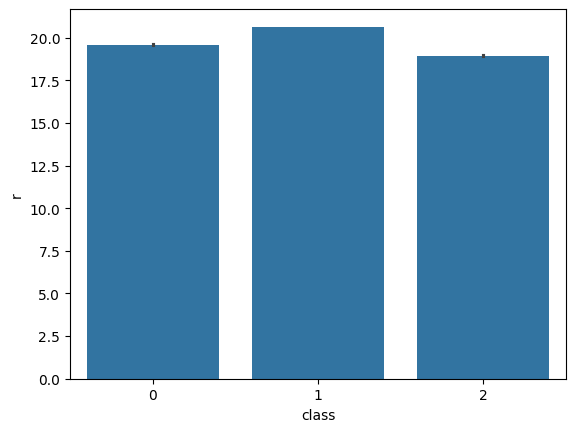

i


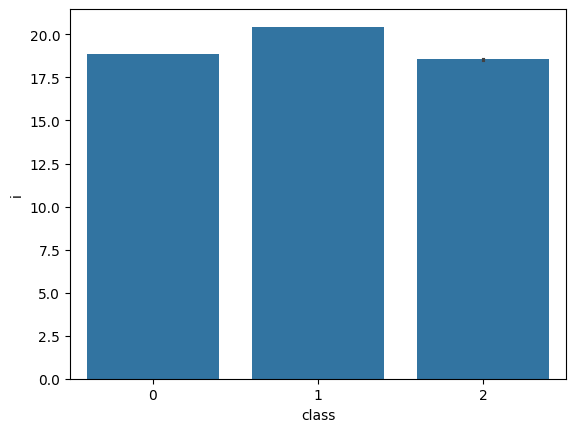

z


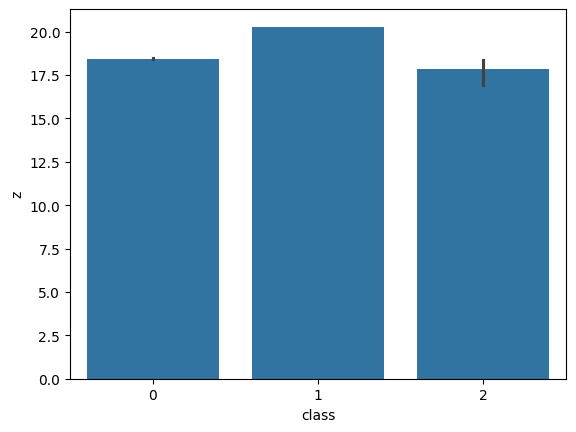

cam_col


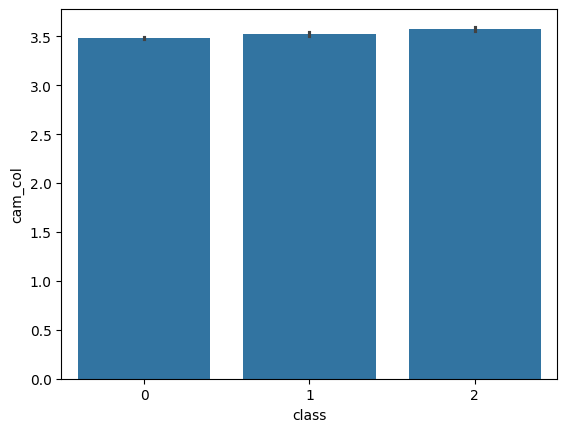

redshift


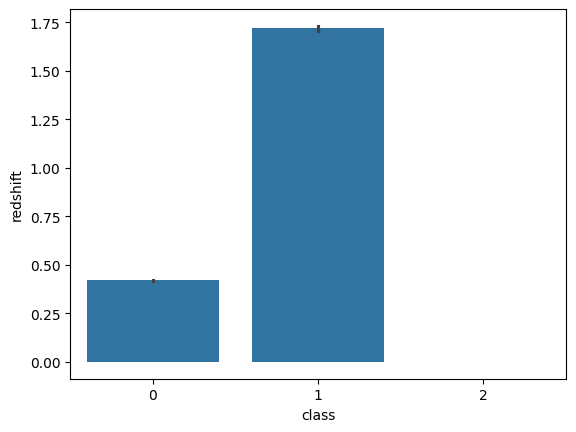

plate


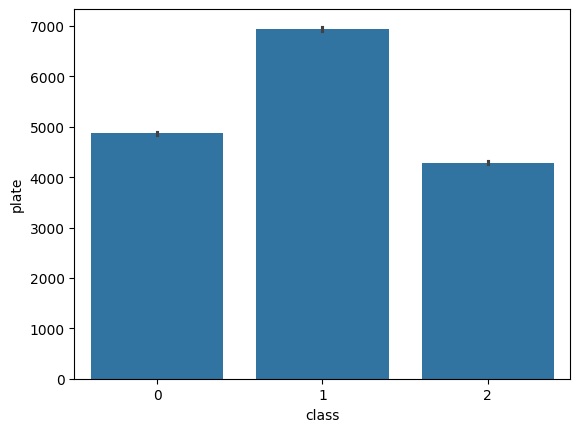

MJD


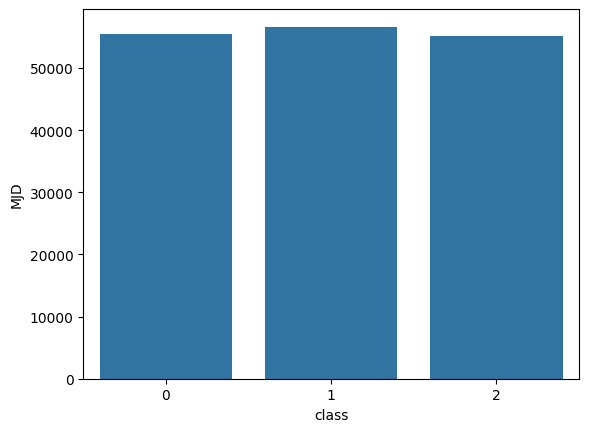

In [13]:
for i in num_cols:
    print(i)
    sns.barplot(
    x = df['class'],
    y = df[i],
    data = df
    )

    plt.xlabel('class')
    plt.ylabel(i)
    plt.show()

# VIF

In [14]:
def calculatevif(x):
    vif = pd.DataFrame()
    vif['VARIABLES'] = x.columns
    vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
    return(vif)

vif = calculatevif(x)
print(vif)

C:\Users\manog\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\regression\linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


      VARIABLES           VIF
0        obj_ID  5.612779e-10
1         alpha  1.000006e+00
2         delta  1.012774e+00
3             u  1.000901e+00
4             g  1.001558e+00
5             r  1.752373e+00
6             i  1.778624e+00
7             z  1.001432e+00
8        run_ID  1.060856e+00
9      rerun_ID  0.000000e+00
10      cam_col  1.000002e+00
11     field_ID  1.007017e+00
12  spec_obj_ID  2.351782e+02
13     redshift  1.177915e+00
14        plate  2.090999e+09
15          MJD  1.701719e+01
16     fiber_ID  1.061814e+00


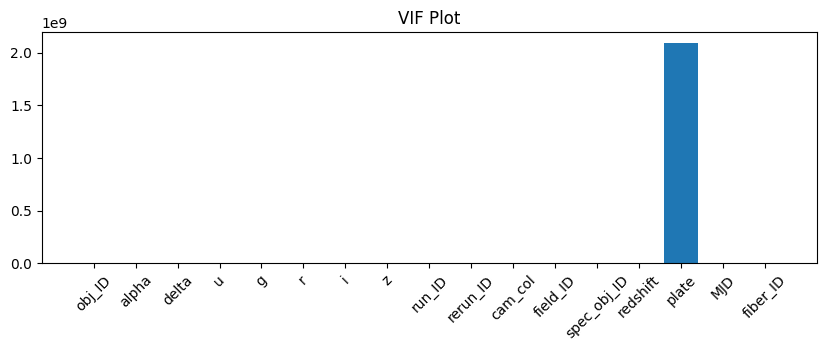

In [15]:
plt.figure(figsize = (10, 3))
plt.bar(vif['VARIABLES'], vif['VIF'])
plt.title("VIF Plot")
plt.xticks(rotation=45)
plt.show()

# ALGORITHMS

IMPORTS

In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.svm import SVC

from sklearn.neighbors import KNeighborsClassifier

from sklearn.naive_bayes import GaussianNB

from sklearn.ensemble import GradientBoostingClassifier

from sklearn.ensemble import AdaBoostClassifier

import xgboost as xgb

import lightgbm as lgb

from catboost import CatBoostClassifier

LOGISTIC REGRESSION

In [17]:
logi = LogisticRegression()

logi.fit(x1_train, y1_train)
logi1_pred = logi.predict(x1_test)

logi.fit(x2_train, y2_train)
logi2_pred = logi.predict(x2_test)

logi.fit(x3_train, y3_train)
logi3_pred = logi.predict(x3_test)

logi.fit(x4_train, y4_train)
logi4_pred = logi.predict(x4_test)

LOG. REG. - METRICS

In [162]:
logi1_acc = accuracy_score(y1_test, logi1_pred)
logi1_prec = precision_score(y1_test, logi1_pred, average = None)
logi1_rec = recall_score(y1_test, logi1_pred, average = None)
logi1_f1 = f1_score(y1_test, logi1_pred, average = None)

print(logi1_acc)
print(logi1_prec)
print(logi1_rec)
print(logi1_f1)

0.6
[0.60644867 0.47730307 0.        ]
[0.96992312 0.12489083 0.        ]
[0.74628154 0.19797868 0.        ]


C:\Users\manog\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [161]:
logi2_acc = accuracy_score(y2_test, logi2_pred)
logi2_prec = precision_score(y2_test, logi2_pred, average = None)
logi2_rec = recall_score(y2_test, logi2_pred, average = None)
logi2_f1 = f1_score(y2_test, logi2_pred, average = None)

print(logi2_acc)
print(logi2_prec)
print(logi2_rec)
print(logi2_f1)

0.5986
[0.60539402 0.47165354 0.        ]
[0.96825504 0.12489575 0.        ]
[0.74498924 0.19749423 0.        ]


C:\Users\manog\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [160]:
logi3_acc = accuracy_score(y3_test, logi3_pred)
logi3_prec = precision_score(y3_test, logi3_pred, average = None)
logi3_rec = recall_score(y3_test, logi3_pred, average = None)
logi3_f1 = f1_score(y3_test, logi3_pred, average = None)

print(logi3_acc)
print(logi3_prec)
print(logi3_rec)
print(logi3_f1)

0.5982
[0.60536439 0.46529814 0.        ]
[0.9677365  0.12457472 0.        ]
[0.74481328 0.19653179 0.        ]


C:\Users\manog\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [159]:
logi4_acc = accuracy_score(y4_test, logi4_pred)
logi4_prec = precision_score(y4_test, logi4_pred, average = None)
logi4_rec = recall_score(y4_test, logi4_pred, average = None)
logi4_f1 = f1_score(y4_test, logi4_pred, average = None)

print(logi4_acc)
print(logi4_prec)
print(logi4_rec)
print(logi4_f1)

0.5991333333333333
[0.60624781 0.46490066 0.        ]
[0.96837856 0.12394068 0.        ]
[0.74567198 0.19570672 0.        ]


C:\Users\manog\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [30]:
logi_acc = max(logi1_acc, logi2_acc, logi3_acc, logi4_acc)
print('BEST ACCURACY OF LOGISTIC REGRESSION = ', logi_acc)

BEST ACCURACY OF LOGISTIC REGRESSION =  0.6


DECISION TREES

In [31]:
deci = DecisionTreeClassifier()

deci.fit(x1_train, y1_train)
deci1pred = deci.predict(x1_test)

deci.fit(x2_train, y2_train)
deci2pred = deci.predict(x2_test)

deci.fit(x3_train, y3_train)
deci3pred = deci.predict(x3_test)

deci.fit(x4_train, y4_train)
deci4pred = deci.predict(x4_test)

DES. TREE - METRICS

In [158]:
deci1_acc = accuracy_score(y1_test, deci1pred)
deci1_prec = precision_score(y1_test, deci1pred, average = None)
deci1_rec = recall_score(y1_test, deci1pred, average = None)
deci1_f1 = f1_score(y1_test, deci1pred, average = None)

print(deci1_acc)
print(deci1_prec)
print(deci1_rec)
print(deci1_f1)

0.965
[0.9703309  0.91389807 0.99595079]
[0.97082094 0.91772926 0.99085838]
[0.97057586 0.91580966 0.99339806]


In [157]:
deci2_acc = accuracy_score(y2_test, deci2pred)
deci2_prec = precision_score(y2_test, deci2pred, average = None)
deci2_rec = recall_score(y2_test, deci2pred, average = None)
deci2_f1 = f1_score(y2_test, deci2pred, average = None)

print(deci2_acc)
print(deci2_prec)
print(deci2_rec)
print(deci2_f1)

0.96668
[0.97362013 0.9130793  0.99608282]
[0.97014221 0.92431193 0.99496926]
[0.97187806 0.91866128 0.99552573]


In [156]:
deci3_acc = accuracy_score(y3_test, deci3pred)
deci3_prec = precision_score(y3_test, deci3pred, average = None)
deci3_rec = recall_score(y3_test, deci3pred, average = None)
deci3_f1 = f1_score(y3_test, deci3pred, average = None)

print(deci3_acc)
print(deci3_prec)
print(deci3_rec)
print(deci3_f1)

0.96605
[0.97279486 0.91169636 0.99650431]
[0.96992671 0.92410364 0.99257196]
[0.97135867 0.91785807 0.99453425]


In [155]:
deci4_acc = accuracy_score(y4_test, deci4pred)
deci4_prec = precision_score(y4_test, deci4pred, average = None)
deci4_rec = recall_score(y4_test, deci4pred, average = None)
deci4_f1 = f1_score(y4_test, deci4pred, average = None)

print(deci4_acc)
print(deci4_prec)
print(deci4_rec)
print(deci4_f1)

0.966
[0.97214735 0.91287614 0.99598518]
[0.97062122 0.92125706 0.99230769]
[0.97138368 0.91704745 0.99414303]


In [36]:
deci_acc = max(deci1_acc, deci2_acc, deci3_acc, deci4_acc)
print('BEST ACCURACY OF DECISION TREE CLASSIFIER = ', deci_acc)

BEST ACCURACY OF DECISION TREE CLASSIFIER =  0.96668


RANDOM FOREST

In [37]:
rf = RandomForestClassifier()

rf.fit(x1_train, y1_train)
rf1_pred = rf.predict(x1_test)

rf.fit(x2_train, y2_train)
rf2_pred = rf.predict(x2_test)

rf.fit(x3_train, y3_train)
rf3_pred = rf.predict(x3_test)

rf.fit(x4_train, y4_train)
rf4_pred = rf.predict(x4_test)

RF - METRICS

In [154]:
rf1_acc = accuracy_score(y1_test, rf1_pred)
rf1_prec = precision_score(y1_test, rf1_pred, average = None)
rf1_rec = recall_score(y1_test, rf1_pred, average = None)
rf1_f1 = f1_score(y1_test, rf1_pred, average = None)

print(rf1_acc)
print(rf1_prec)
print(rf1_rec)
print(rf1_f1)

0.9797
[0.97869737 0.96937851 0.99123347]
[0.98737445 0.93449782 0.99860552]
[0.98301676 0.95161864 0.99490584]


In [153]:
rf2_acc = accuracy_score(y2_test, rf2_pred)
rf2_prec = precision_score(y2_test, rf2_pred, average = None)
rf2_rec = recall_score(y2_test, rf2_pred, average = None)
rf2_f1 = f1_score(y2_test, rf2_pred, average = None)

print(rf2_acc)
print(rf2_prec)
print(rf2_rec)
print(rf2_f1)

0.97944
[0.98015421 0.96487471 0.99002954]
[0.985307   0.93932444 0.99906838]
[0.98272385 0.95192816 0.99452842]


In [152]:
rf3_acc = accuracy_score(y3_test, rf3_pred)
rf3_prec = precision_score(y3_test, rf3_pred, average = None)
rf3_rec = recall_score(y3_test, rf3_pred, average = None)
rf3_f1 = f1_score(y3_test, rf3_pred, average = None)

print(rf3_acc)
print(rf3_prec)
print(rf3_rec)
print(rf3_f1)

0.98075
[0.98098987 0.96849758 0.99056387]
[0.98677449 0.9413766  0.99907149]
[0.98387368 0.95474453 0.99479949]


In [151]:
rf4_acc = accuracy_score(y4_test, rf4_pred)
rf4_prec = precision_score(y4_test, rf4_pred, average = None)
rf4_rec = recall_score(y4_test, rf4_pred, average = None)
rf4_f1 = f1_score(y4_test, rf4_pred, average = None)

print(rf4_acc)
print(rf4_prec)
print(rf4_rec)
print(rf4_f1)

0.9804
[0.98028514 0.96728462 0.99174564]
[0.98688047 0.93961864 0.99815385]
[0.98357175 0.95325094 0.99493943]


In [42]:
rf_acc = max(rf1_acc, rf2_acc, rf3_acc, rf4_acc)
print('BEST ACCURACY OF RANDOM FOREST CLASSIFIER = ', rf_acc)

BEST ACCURACY OF RANDOM FOREST CLASSIFIER =  0.98075


SUPPORT VECTOR MACHINES

In [43]:
svm = SVC()

svm.fit(x1_train, y1_train)
svm1_pred = svm.predict(x1_test)

In [44]:
svm.fit(x2_train, y2_train)
svm2_pred = svm.predict(x2_test)

In [45]:
svm.fit(x3_train, y3_train)
svm3_pred = svm.predict(x3_test)

In [46]:
svm.fit(x4_train, y4_train)
svm4_pred = svm.predict(x4_test)

SVM - METRICS

In [150]:
svm1_acc = accuracy_score(y1_test, svm1_pred)
svm1_prec = precision_score(y1_test, svm1_pred, average = None)
svm1_rec = recall_score(y1_test, svm1_pred, average = None)
svm1_f1 = f1_score(y1_test, svm1_pred, average = None)

print(svm1_acc)
print(svm1_prec)
print(svm1_rec)
print(svm1_f1)

0.5939666666666666
[0.59450425 0.40697674 0.        ]
[0.9979238  0.00611354 0.        ]
[0.74511365 0.01204612 0.        ]


C:\Users\manog\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [149]:
svm2_acc = accuracy_score(y2_test, svm2_pred)
svm2_prec = precision_score(y2_test, svm2_pred, average = None)
svm2_rec = recall_score(y2_test, svm2_pred, average = None)
svm2_f1 = f1_score(y2_test, svm2_pred, average = None)

print(svm2_acc)
print(svm2_prec)
print(svm2_rec)
print(svm2_f1)

0.5934
[0.59397441 0.39726027 0.        ]
[0.99791063 0.00604671 0.        ]
[0.74469369 0.0119121  0.        ]


C:\Users\manog\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [148]:
svm3_acc = accuracy_score(y3_test, svm3_pred) 
svm3_prec = precision_score(y3_test, svm3_pred, average = None) 
svm3_rec = recall_score(y3_test, svm3_pred, average = None) 
svm3_f1 = f1_score(y3_test, svm3_pred, average = None) 

print(svm3_acc)
print(svm3_prec)
print(svm3_rec)
print(svm3_f1)

0.59345
[0.59398496 0.38       0.        ]
[0.99823098 0.00497252 0.        ]
[0.74479118 0.00981658 0.        ]


C:\Users\manog\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [147]:
svm4_acc = accuracy_score(y4_test, svm4_pred)
svm4_prec = precision_score(y4_test, svm4_pred, average = None)
svm4_rec = recall_score(y4_test, svm4_pred, average = None)
svm4_f1 = f1_score(y4_test, svm4_pred, average = None)

print(svm4_acc)
print(svm4_prec)
print(svm4_rec)
print(svm4_f1)

0.5944666666666667
[0.59502641 0.3902439  0.        ]
[0.99809374 0.00564972 0.        ]
[0.74557105 0.01113818 0.        ]


C:\Users\manog\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [51]:
svm_acc = max(svm1_acc, svm2_acc, svm3_acc, svm4_acc)
print('BEST ACCURACY OF RANDOM FOREST CLASSIFIER = ', svm_acc)

BEST ACCURACY OF RANDOM FOREST CLASSIFIER =  0.5944666666666667


K NEAREST NEIGHBOUR

In [52]:
knn = KNeighborsClassifier()

knn.fit(x1_train, y1_train)
knn1_pred = knn.predict(x1_test)

knn.fit(x2_train, y2_train)
knn2_pred = knn.predict(x2_test)

knn.fit(x3_train, y3_train)
knn3_pred = knn.predict(x3_test)

knn.fit(x4_train, y4_train)
knn4_pred = knn.predict(x4_test)

KNN - METRICS

In [146]:
knn1_acc = accuracy_score(y1_test, knn1_pred)
knn1_prec = precision_score(y1_test, knn1_pred, average = None)
knn1_rec = recall_score(y1_test, knn1_pred, average = None)
knn1_f1 = f1_score(y1_test, knn1_pred, average = None)

print(knn1_acc)
print(knn1_prec)
print(knn1_rec)
print(knn1_f1)

0.7017333333333333
[0.73973824 0.48931578 0.74469136]
[0.88485495 0.39598253 0.4673071 ]
[0.80581532 0.43772929 0.57425743]


In [145]:
knn2_acc = accuracy_score(y2_test, knn2_pred)
knn2_prec = precision_score(y2_test, knn2_pred, average = None)
knn2_rec = recall_score(y2_test, knn2_pred, average = None)
knn2_f1 = f1_score(y2_test, knn2_pred, average = None)

print(knn2_acc)
print(knn2_prec)
print(knn2_rec)
print(knn2_f1)

0.70272
[0.74046747 0.4936512  0.74305966]
[0.88609557 0.39720601 0.46879076]
[0.8067624  0.44020797 0.57488861]


In [144]:
knn3_acc = accuracy_score(y3_test, knn3_pred)
knn3_prec = precision_score(y3_test, knn3_pred, average = None)
knn3_rec = recall_score(y3_test, knn3_pred, average = None)
knn3_f1 = f1_score(y3_test, knn3_pred, average = None)

print(knn3_acc)
print(knn3_prec)
print(knn3_rec)
print(knn3_f1)

0.7027
[0.74119805 0.48988911 0.74139804]
[0.88492966 0.39309081 0.47516249]
[0.80671172 0.43618411 0.57914839]


In [143]:
knn4_acc = accuracy_score(y4_test, knn4_pred)
knn4_prec = precision_score(y4_test, knn4_pred, average = None)
knn4_rec = recall_score(y4_test, knn4_pred, average = None)
knn4_f1 = f1_score(y4_test, knn4_pred, average = None)

print(knn4_acc)
print(knn4_prec)
print(knn4_rec)
print(knn4_f1)

0.7037333333333333
[0.74106389 0.48753826 0.75073028]
[0.88573671 0.39371469 0.47446154]
[0.80696736 0.43563196 0.58144796]


In [57]:
knn_acc = max(knn1_acc, knn2_acc, knn3_acc, knn4_acc)
print('BEST ACCURACY OF KNN CLASSIFIER = ', knn_acc)

BEST ACCURACY OF KNN CLASSIFIER =  0.7037333333333333


NAIVE BAYES

In [58]:
nb = GaussianNB()

nb.fit(x1_train, y1_train)
nb1_pred = nb.predict(x1_test)

nb.fit(x2_train, y2_train)
nb2_pred = nb.predict(x2_test)

nb.fit(x3_train, y3_train)
nb3_pred = nb.predict(x3_test)

nb.fit(x4_train, y4_train)
nb4_pred = nb.predict(x4_test)

In [142]:
nb1_acc = accuracy_score(y1_test, nb1_pred)
nb1_prec = precision_score(y1_test, nb1_pred, average = None)
nb1_rec = recall_score(y1_test, nb1_pred, average = None)
nb1_f1 = f1_score(y1_test, nb1_pred, average = None)

print(nb1_acc)
print(nb1_prec)
print(nb1_rec)
print(nb1_f1)

0.6031333333333333
[0.60757459 0.51088534 0.        ]
[0.97581505 0.12296943 0.        ]
[0.74887497 0.1982261  0.        ]


C:\Users\manog\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [141]:
nb2_acc = accuracy_score(y2_test, nb2_pred)
nb2_prec = precision_score(y2_test, nb2_pred, average = None)
nb2_rec = recall_score(y2_test, nb2_pred, average = None)
nb2_f1 = f1_score(y2_test, nb2_pred, average = None)

print(nb2_acc)
print(nb2_prec)
print(nb2_rec)
print(nb2_f1)

0.60176
[0.60651198 0.50471294 0.        ]
[0.97425356 0.12281068 0.        ]
[0.74760796 0.19755157 0.        ]


C:\Users\manog\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [140]:
nb3_acc = accuracy_score(y3_test, nb3_pred)
nb3_prec = precision_score(y3_test, nb3_pred, average = None)
nb3_rec = recall_score(y3_test, nb3_pred, average = None)
nb3_f1 = f1_score(y3_test, nb3_pred, average = None)

print(nb3_acc)
print(nb3_prec)
print(nb3_rec)
print(nb3_f1)

0.60115
[0.60648683 0.49365751 0.        ]
[0.97346475 0.12221931 0.        ]
[0.74735651 0.19593035 0.        ]


C:\Users\manog\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [138]:
nb4_acc = accuracy_score(y4_test, nb4_pred)
nb4_prec = precision_score(y4_test, nb4_pred, average = None)
nb4_rec = recall_score(y4_test, nb4_pred, average = None)
nb4_f1 = f1_score(y4_test, nb4_pred, average = None)

print(nb4_acc)
print(nb4_prec)
print(nb4_rec)
print(nb4_f1)

0.6019333333333333
[0.60733021 0.49217639 0.        ]
[0.9736488  0.12217514 0.        ]
[0.74805083 0.19575672 0.        ]


C:\Users\manog\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [63]:
nb_acc = max(nb1_acc, nb2_acc, nb3_acc, nb4_acc)
print('BEST ACCURACY OF NAIVE BAYES CLASSIFIER = ', nb_acc)

BEST ACCURACY OF NAIVE BAYES CLASSIFIER =  0.6031333333333333


GRADIENT BOOST

In [64]:
gb = GradientBoostingClassifier()

gb.fit(x1_train, y1_train)
gb1_pred = gb.predict(x1_test)

In [65]:
gb.fit(x2_train, y2_train)
gb2_pred = gb.predict(x2_test)

In [66]:
gb.fit(x3_train, y3_train)
gb3_pred = gb.predict(x3_test)

In [67]:
gb.fit(x4_train, y4_train)
gb4_pred = gb.predict(x4_test)

GRADIENT BOOST - METRICS

In [137]:
gb1_acc = accuracy_score(y1_test, gb1_pred)
gb1_prec = precision_score(y1_test, gb1_pred, average = None)
gb1_rec = recall_score(y1_test, gb1_pred, average = None)
gb1_f1 = f1_score(y1_test, gb1_pred, average = None)

print(gb1_acc)
print(gb1_prec)
print(gb1_rec)
print(gb1_f1)

0.9771666666666666
[0.97342395 0.96733945 0.99596962]
[0.98860894 0.92087336 0.99550666]
[0.98095768 0.94353468 0.99573809]


In [136]:
gb2_acc = accuracy_score(y2_test, gb2_pred)
gb2_prec = precision_score(y2_test, gb2_pred, average = None)
gb2_rec = recall_score(y2_test, gb2_pred, average = None)
gb2_f1 = f1_score(y2_test, gb2_pred, average = None)

print(gb2_acc)
print(gb2_prec)
print(gb2_rec)
print(gb2_f1)

0.97768
[0.97454304 0.96638289 0.9960923 ]
[0.98820516 0.92306088 0.99739147]
[0.98132655 0.94422523 0.99674146]


In [135]:
gb3_acc = accuracy_score(y3_test, gb3_pred)
gb3_prec = precision_score(y3_test, gb3_pred, average = None)
gb3_rec = recall_score(y3_test, gb3_pred, average = None)
gb3_f1 = f1_score(y3_test, gb3_pred, average = None)

print(gb3_acc)
print(gb3_prec)
print(gb3_rec)
print(gb3_f1)

0.97845
[0.97484642 0.96923077 0.99629115]
[0.98921742 0.9233185  0.99767874]
[0.98197935 0.94571773 0.99698446]


In [134]:
gb4_acc = accuracy_score(y4_test, gb4_pred)
gb4_prec = precision_score(y4_test, gb4_pred, average = None)
gb4_rec = recall_score(y4_test, gb4_pred, average = None)
gb4_f1 = f1_score(y4_test, gb4_pred, average = None)

print(gb4_acc)
print(gb4_prec)
print(gb4_rec)
print(gb4_f1)

0.9786666666666667
[0.97513263 0.96922506 0.99631336]
[0.98934739 0.9230226  0.99784615]
[0.98218858 0.94555978 0.99707917]


In [72]:
gb_acc = max(gb1_acc, gb2_acc, gb3_acc, gb4_acc)
print('BEST ACCURACY OF GRADIENT BOOSTING CLASSIFIER = ', gb_acc)

BEST ACCURACY OF GRADIENT BOOSTING CLASSIFIER =  0.9786666666666667


ADABOOST

In [73]:
adb = AdaBoostClassifier()

adb.fit(x1_train, y1_train)
adb1_pred = adb.predict(x1_test)

adb.fit(x2_train, y2_train)
adb2_pred = adb.predict(x2_test)

adb.fit(x3_train, y3_train)
adb3_pred = adb.predict(x3_test)

adb.fit(x4_train, y4_train)
adb4_pred = adb.predict(x4_test)

C:\Users\manog\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\manog\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\manog\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent th

ADABOOST - METRICS

In [133]:
adb1_acc = accuracy_score(y1_test, adb1_pred)
adb1_prec = precision_score(y1_test, adb1_pred, average = None)
adb1_rec = recall_score(y1_test, adb1_pred, average = None)
adb1_f1 = f1_score(y1_test, adb1_pred, average = None)

print(adb1_acc)
print(adb1_prec)
print(adb1_rec)
print(adb1_f1)

0.7307666666666667
[0.74133148 0.18203737 0.97828765]
[0.83979575 0.10550218 0.98435079]
[0.7874977  0.13358399 0.98130985]


In [132]:
adb2_acc = accuracy_score(y2_test, adb2_pred)
adb2_prec = precision_score(y2_test, adb2_pred, average = None)
adb2_rec = recall_score(y2_test, adb2_pred, average = None)
adb2_f1 = f1_score(y2_test, adb2_pred, average = None)

print(adb2_acc)
print(adb2_prec)
print(adb2_rec)
print(adb2_f1)

0.67676
[0.73576214 0.20536734 0.97785161]
[0.71052099 0.22497915 0.98714366]
[0.72292131 0.21472637 0.98247566]


In [131]:
adb3_acc = accuracy_score(y3_test, adb3_pred)
adb3_prec = precision_score(y3_test, adb3_pred, average = None)
adb3_rec = recall_score(y3_test, adb3_pred, average = None)
adb3_f1 = f1_score(y3_test, adb3_pred, average = None)

print(adb3_acc)
print(adb3_prec)
print(adb3_rec)
print(adb3_f1)

0.68715
[0.78319209 0.31788079 0.97832817]
[0.65394659 0.4899241  0.95357474]
[0.71275766 0.38558187 0.96579288]


In [130]:
adb4_acc = accuracy_score(y4_test, adb4_pred)
adb4_prec = precision_score(y4_test, adb4_pred, average = None)
adb4_rec = recall_score(y4_test, adb4_pred, average = None)
adb4_f1 = f1_score(y4_test, adb4_pred, average = None)

print(adb4_acc)
print(adb4_prec)
print(adb4_rec)
print(adb4_f1)

0.5818666666666666
[0.71242775 0.19187111 0.97975831]
[0.49753308 0.3700565  0.99784615]
[0.58589727 0.2527128  0.98871951]


In [78]:
adb_acc = max(adb1_acc, adb2_acc, adb3_acc, adb4_acc)
print('BEST ACCURACY OF ADA BOOST CLASSIFIER = ', adb_acc)

BEST ACCURACY OF ADA BOOST CLASSIFIER =  0.7307666666666667


XG BOOST

In [79]:
xgb = xgb.XGBClassifier()

xgb.fit(x1_train, y1_train)
xgb1_pred = xgb.predict(x1_test)

xgb.fit(x2_train, y2_train)
xgb2_pred = xgb.predict(x2_test)

xgb.fit(x3_train, y3_train)
xgb3_pred = xgb.predict(x3_test)

xgb.fit(x4_train, y4_train)
xgb4_pred = xgb.predict(x4_test)

XGBOOST - METRICS

In [129]:
xgb1_acc = accuracy_score(y1_test, xgb1_pred)
xgb1_prec = precision_score(y1_test, xgb1_pred, average = None)
xgb1_rec = recall_score(y1_test, xgb1_pred, average = None)
xgb1_f1 = f1_score(y1_test, xgb1_pred, average = None)

print(xgb1_acc)
print(xgb1_prec)
print(xgb1_rec)
print(xgb1_f1)

0.9774666666666667
[0.9776057  0.96368213 0.98890088]
[0.98473711 0.93624454 0.99395724]
[0.98115845 0.94976522 0.99142261]


In [128]:
xgb2_acc = accuracy_score(y2_test, xgb2_pred)
xgb2_prec = precision_score(y2_test, xgb2_pred, average = None)
xgb2_rec = recall_score(y2_test, xgb2_pred, average = None)
xgb2_f1 = f1_score(y2_test, xgb2_pred, average = None)

print(xgb2_acc)
print(xgb2_prec)
print(xgb2_rec)
print(xgb2_f1)

0.97784
[0.97823758 0.96298674 0.98961424]
[0.98463301 0.93849041 0.99422396]
[0.98142488 0.95058078 0.99191375]


In [127]:
xgb3_acc = accuracy_score(y3_test, xgb3_pred)
xgb3_prec = precision_score(y3_test, xgb3_pred, average = None)
xgb3_rec = recall_score(y3_test, xgb3_pred, average = None)
xgb3_f1 = f1_score(y3_test, xgb3_pred, average = None)

print(xgb3_acc)
print(xgb3_prec)
print(xgb3_rec)
print(xgb3_f1)

0.97735
[0.9779024  0.96189965 0.98913546]
[0.98416309 0.93823606 0.99326834]
[0.98102276 0.94992051 0.99119759]


In [126]:
xgb4_acc = accuracy_score(y4_test, xgb4_pred)
xgb4_prec = precision_score(y4_test, xgb4_pred, average = None)
xgb4_rec = recall_score(y4_test, xgb4_pred, average = None)
xgb4_f1 = f1_score(y4_test, xgb4_pred, average = None)

print(xgb4_acc)
print(xgb4_prec)
print(xgb4_rec)
print(xgb4_f1)

0.9782
[0.97903657 0.96206647 0.98958333]
[0.98452568 0.94032486 0.99384615]
[0.98177345 0.95107143 0.99171016]


In [84]:
xgb_acc = max(xgb1_acc, xgb2_acc, xgb3_acc, xgb4_acc)
print('BEST ACCURACY OF XGBOOST CLASSIFIER = ', xgb_acc)

BEST ACCURACY OF XGBOOST CLASSIFIER =  0.9782


CAT BOOST

In [85]:
cb = CatBoostClassifier()

cb.fit(x1_train, y1_train)
cb1_pred = cb.predict(x1_test)

cb.fit(x2_train, y2_train)
cb2_pred = cb.predict(x2_test)

cb.fit(x3_train, y3_train)
cb3_pred = cb.predict(x3_test)

cb.fit(x4_train, y4_train)
cb4_pred = cb.predict(x4_test)

Learning rate set to 0.098271
0:	learn: 0.9419048	total: 196ms	remaining: 3m 16s
1:	learn: 0.8166302	total: 226ms	remaining: 1m 52s
2:	learn: 0.7164417	total: 254ms	remaining: 1m 24s
3:	learn: 0.6361067	total: 281ms	remaining: 1m 10s
4:	learn: 0.5693514	total: 310ms	remaining: 1m 1s
5:	learn: 0.5129658	total: 340ms	remaining: 56.3s
6:	learn: 0.4653904	total: 368ms	remaining: 52.3s
7:	learn: 0.4242679	total: 398ms	remaining: 49.3s
8:	learn: 0.3880702	total: 429ms	remaining: 47.2s
9:	learn: 0.3563906	total: 457ms	remaining: 45.3s
10:	learn: 0.3293157	total: 488ms	remaining: 43.9s
11:	learn: 0.3058726	total: 515ms	remaining: 42.4s
12:	learn: 0.2849077	total: 544ms	remaining: 41.3s
13:	learn: 0.2664486	total: 573ms	remaining: 40.3s
14:	learn: 0.2496681	total: 601ms	remaining: 39.5s
15:	learn: 0.2351236	total: 628ms	remaining: 38.6s
16:	learn: 0.2225520	total: 654ms	remaining: 37.8s
17:	learn: 0.2111211	total: 680ms	remaining: 37.1s
18:	learn: 0.2009027	total: 706ms	remaining: 36.4s
19:	lea

CATBOOST - METRICS

In [125]:
cb1_acc = accuracy_score(y1_test, cb1_pred)
cb1_prec = precision_score(y1_test, cb1_pred, average = None)
cb1_rec = recall_score(y1_test, cb1_pred, average = None)
cb1_f1 = f1_score(y1_test, cb1_pred, average = None)

print(cb1_acc)
print(cb1_prec)
print(cb1_rec)
print(cb1_f1)

0.9803
[0.97962592 0.96719539 0.99337238]
[0.98748667 0.93729258 0.99860552]
[0.98354059 0.95200923 0.99598207]


In [124]:
cb2_acc = accuracy_score(y2_test, cb2_pred)
cb2_prec = precision_score(y2_test, cb2_pred, average = None)
cb2_rec = recall_score(y2_test, cb2_pred, average = None)
cb2_f1 = f1_score(y2_test, cb2_pred, average = None)

print(cb2_acc)
print(cb2_prec)
print(cb2_rec)
print(cb2_f1)

0.9806
[0.9806443  0.96513369 0.99388209]
[0.98685718 0.94078399 0.99888206]
[0.98374093 0.95280329 0.9963758 ]


In [123]:
cb3_acc = accuracy_score(y3_test, cb3_pred)
cb3_prec = precision_score(y3_test, cb3_pred, average = None)
cb3_rec = recall_score(y3_test, cb3_pred, average = None)
cb3_f1 = f1_score(y3_test, cb3_pred, average = None)

print(cb3_acc)
print(cb3_prec)
print(cb3_rec)
print(cb3_f1)

0.98115
[0.98043969 0.96765499 0.99468454]
[0.98803808 0.93954462 0.99907149]
[0.98422422 0.95339264 0.99687319]


In [122]:
cb4_acc = accuracy_score(y4_test, cb4_pred)
cb4_prec = precision_score(y4_test, cb4_pred, average = None)
cb4_rec = recall_score(y4_test, cb4_pred, average = None)
cb4_f1 = f1_score(y4_test, cb4_pred, average = None)

print(cb4_acc)
print(cb4_prec)
print(cb4_rec)
print(cb4_f1)

0.9808666666666667
[0.98137408 0.96353791 0.99417892]
[0.9866562  0.9424435  0.99846154]
[0.98400805 0.95287397 0.99631563]


In [90]:
cb_acc = max(cb1_acc, cb2_acc, cb3_acc, cb4_acc)
print('BEST ACCURACY OF CATBOOST CLASSIFIER = ', cb_acc)

BEST ACCURACY OF CATBOOST CLASSIFIER =  0.98115


LIGHT GBM

In [91]:
lgb = lgb.LGBMClassifier()

lgb.fit(x1_train, y1_train)
lgb1_pred = lgb.predict(x1_test)

lgb.fit(x2_train, y2_train)
lgb2_pred = lgb.predict(x2_test)

lgb.fit(x3_train, y3_train)
lgb3_pred = lgb.predict(x3_test)

lgb.fit(x4_train, y4_train)
lgb4_pred = lgb.predict(x4_test)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002922 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3802
[LightGBM] [Info] Number of data points in the train set: 70000, number of used features: 16
[LightGBM] [Info] Start training from score -0.519818
[LightGBM] [Info] Start training from score -1.665555
[LightGBM] [Info] Start training from score -1.531155
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007893 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3802
[LightGBM] [Info] Number of data points in the train set: 75000, number of used features: 16
[LightGBM] [Info] Start training from score -0.519575
[LightGBM] [Info] Start training from score -1.666714
[LightGBM] [Info] Start training from score -1.530812
[LightGBM] [Info] Auto-choosing co

LIGHT GBM - METRICS

In [121]:
lgb1_acc = accuracy_score(y1_test, lgb1_pred)
lgb1_prec = precision_score(y1_test, lgb1_pred, average = None)
lgb1_rec = recall_score(y1_test, lgb1_pred, average = None)
lgb1_f1 = f1_score(y1_test, lgb1_pred, average = None)

print(lgb1_acc)
print(lgb1_prec)
print(lgb1_rec)
print(lgb1_f1)

0.9793
[0.97879092 0.96366253 0.99413309]
[0.98664497 0.93572052 0.99767586]
[0.98270225 0.949486   0.99590132]


In [117]:
lgb2_acc = accuracy_score(y2_test, lgb2_pred)
lgb2_prec = precision_score(y2_test, lgb2_pred, average = None)
lgb2_rec = recall_score(y2_test, lgb2_pred, average = None)
lgb2_f1 = f1_score(y2_test, lgb2_pred, average = None)

print(lgb2_acc)
print(lgb2_prec)
print(lgb2_rec)
print(lgb2_f1)

0.97956
[0.97990219 0.9609475  0.9948023 ]
[0.9858462  0.93890742 0.99850941]
[0.98286521 0.94979962 0.99665241]


In [115]:
lgb3_acc = accuracy_score(y3_test, lgb3_pred)
lgb3_prec = precision_score(y3_test, lgb3_pred, average = None)
lgb3_rec = recall_score(y3_test, lgb3_pred, average = None)
lgb3_f1 = f1_score(y3_test, lgb3_pred, average = None)

print(lgb3_acc)
print(lgb3_prec)
print(lgb3_rec)
print(lgb3_f1)

0.97985
[0.97959354 0.96219839 0.99582657]
[0.98669025 0.93928291 0.99698236]
[0.98312909 0.95060257 0.99640413]


In [120]:
lgb4_acc = accuracy_score(y4_test, lgb4_pred)
lgb4_prec = precision_score(y4_test, lgb4_pred, average = None)
lgb4_rec = recall_score(y4_test, lgb4_pred, average = None)
lgb4_f1 = f1_score(y4_test, lgb4_pred, average = None)

print(lgb4_acc)
print(lgb4_prec)
print(lgb4_rec)
print(lgb4_f1)

0.9806
[0.98040089 0.96280246 0.99630883]
[0.98721686 0.94138418 0.99661538]
[0.98379707 0.95197286 0.99646208]


In [96]:
lgb_acc = max(lgb1_acc, lgb2_acc, lgb3_acc, lgb4_acc)
print('BEST ACCURACY OF LIGHTGBM CLASSIFIER = ', lgb_acc)

BEST ACCURACY OF LIGHTGBM CLASSIFIER =  0.9806


# NEURAL NETWORK

IMPORTS

In [8]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [14]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

nn = Sequential()

SPLIT - 1

In [16]:
nn.add(Dense(128, input_dim = x1_train.shape[1], activation='relu'))
nn.add(Dense(64, activation='relu'))
nn.add(Dense(3, activation='softmax'))

nn.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

nn.fit(x1_train, y1_train, epochs=50, batch_size=32, validation_data=(x1_test, y1_test), verbose=1)

nn1_pred = np.argmax(nn.predict(x1_test), axis=-1)

C:\Users\manog\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.4767 - loss: 20501721444777984.0000 - val_accuracy: 0.4962 - val_loss: 25708241862262784.0000
Epoch 2/50
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.4872 - loss: 10614164489764864.0000 - val_accuracy: 0.3419 - val_loss: 3944087795269632.0000
Epoch 3/50
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.4900 - loss: 6916627144638464.0000 - val_accuracy: 0.2559 - val_loss: 8151934364024832.0000
Epoch 4/50
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.4917 - loss: 4550762663247872.0000 - val_accuracy: 0.5940 - val_loss: 6589868717113344.0000
Epoch 5/50
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.4985 - loss: 2519966834229248.0000 - val_accuracy: 0.5464 - val_loss: 730184101658624.0000
Epoch 6/50
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.4986 - loss: 1607961935872000.0000 - val_accuracy: 0.6318 - val_loss: 407644170878976.0000
Epoch 7/50
2188/2188 ━━━━━━━━━━━━━━━━━━

SPLIT - 2

In [101]:
nn.add(Dense(128, input_dim = x2_train.shape[1], activation='relu'))
nn.add(Dense(64, activation='relu'))
nn.add(Dense(3, activation='softmax'))

nn.compile(loss='sparse_categorical_crossentropy', 
           optimizer='adam', metrics=['accuracy'])

nn.fit(x2_train, y2_train, epochs=50, batch_size=32, 
       validation_data=(x2_test, y2_test), verbose=1)

nn2_pred = np.argmax(nn.predict(x2_test), axis=-1)

C:\Users\manog\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
2344/2344 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.5916 - loss: 0.9617 - val_accuracy: 0.5935 - val_loss: 0.9596
Epoch 2/50
2344/2344 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.5965 - loss: 0.9535 - val_accuracy: 0.5935 - val_loss: 0.9573
Epoch 3/50
2344/2344 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.5959 - loss: 0.9546 - val_accuracy: 0.5935 - val_loss: 0.9582
Epoch 4/50
2344/2344 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.5960 - loss: 0.9548 - val_accuracy: 0.5935 - val_loss: 0.9586
Epoch 5/50
2344/2344 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.5921 - loss: 0.9586 - val_accuracy: 0.5935 - val_loss: 0.9579
Epoch 6/50
2344/2344 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.5969 - loss: 0.9533 - val_accuracy: 0.5935 - val_loss: 0.9575
Epoch 7/50
2344/2344 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.5961 - loss: 0.9543 - val_accuracy: 0.5935 - val_loss: 0.9577
Epoch 8/50
2344/2344 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.5972 - loss: 0.9526 -

SPLIT - 3 

In [102]:
nn.add(Dense(128, input_dim = x3_train.shape[1], activation='relu'))
nn.add(Dense(64, activation='relu'))
nn.add(Dense(3, activation='softmax'))

nn.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

nn.fit(x3_train, y3_train, epochs=50, batch_size=32, validation_data=(x1_test, y1_test), verbose=1)

nn3_pred = np.argmax(nn.predict(x3_test), axis=-1)

Epoch 1/50


C:\Users\manog\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2500/2500 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - accuracy: 0.5904 - loss: 0.9631 - val_accuracy: 0.5940 - val_loss: 0.9567
Epoch 2/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.5951 - loss: 0.9553 - val_accuracy: 0.5940 - val_loss: 0.9562
Epoch 3/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.5944 - loss: 0.9561 - val_accuracy: 0.5940 - val_loss: 0.9563
Epoch 4/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 501s 200ms/step - accuracy: 0.5934 - loss: 0.9572 - val_accuracy: 0.5940 - val_loss: 0.9582
Epoch 5/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.5930 - loss: 0.9577 - val_accuracy: 0.5940 - val_loss: 0.9562
Epoch 6/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.5949 - loss: 0.9556 - val_accuracy: 0.5940 - val_loss: 0.9567
Epoch 7/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.5929 - loss: 0.9577 - val_accuracy: 0.5940 - val_loss: 0.9561
Epoch 8/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.5965 - loss: 0.9537 - 

SPLIT - 4

In [103]:
nn.add(Dense(128, input_dim = x4_train.shape[1], activation='relu'))
nn.add(Dense(64, activation='relu'))
nn.add(Dense(3, activation='softmax'))

nn.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

nn.fit(x4_train, y4_train, epochs=50, batch_size=32, validation_data=(x1_test, y1_test), verbose=1)

nn4_pred = np.argmax(nn.predict(x4_test), axis=-1)

Epoch 1/50


C:\Users\manog\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2657/2657 ━━━━━━━━━━━━━━━━━━━━ 18s 5ms/step - accuracy: 0.5950 - loss: 0.9578 - val_accuracy: 0.5940 - val_loss: 0.9570
Epoch 2/50
2657/2657 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - accuracy: 0.5944 - loss: 0.9567 - val_accuracy: 0.5940 - val_loss: 0.9568
Epoch 3/50
2657/2657 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.5940 - loss: 0.9569 - val_accuracy: 0.5940 - val_loss: 0.9564
Epoch 4/50
2657/2657 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.5944 - loss: 0.9561 - val_accuracy: 0.5940 - val_loss: 0.9563
Epoch 5/50
2657/2657 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.5963 - loss: 0.9541 - val_accuracy: 0.5940 - val_loss: 0.9560
Epoch 6/50
2657/2657 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.5912 - loss: 0.9594 - val_accuracy: 0.5940 - val_loss: 0.9562
Epoch 7/50
2657/2657 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.5924 - loss: 0.9581 - val_accuracy: 0.5940 - val_loss: 0.9563
Epoch 8/50
2657/2657 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.5930 - loss: 0.9577 - val

NEURAL NETWORK - METRICS

In [19]:
nn1_acc = accuracy_score(y1_test, nn1_pred)
nn1_prec = precision_score(y1_test, nn1_pred, average = None)
nn1_rec = recall_score(y1_test, nn1_pred, average = None)
nn1_f1 = f1_score(y1_test, nn1_pred, average = None)

print(nn1_acc)
print(nn1_prec)
print(nn1_rec)
print(nn1_f1)

0.5940333333333333
[0.59403333 0.         0.        ]
[1. 0. 0.]
[0.74532109 0.         0.        ]


C:\Users\manog\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [113]:
nn2_acc = accuracy_score(y2_test, nn2_pred)
nn2_prec = precision_score(y2_test, nn2_pred, average = None)
nn2_rec = recall_score(y2_test, nn2_pred, average = None)
nn2_f1 = f1_score(y2_test, nn2_pred, average = None)

print(nn2_acc)
print(nn2_prec)
print(nn2_rec)
print(nn2_f1)

0.59348
[0.59348 0.      0.     ]
[1. 0. 0.]
[0.74488541 0.         0.        ]


C:\Users\manog\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [111]:
nn3_acc = accuracy_score(y3_test, nn3_pred)
nn3_prec = precision_score(y3_test, nn3_pred, average = None)
nn3_rec = recall_score(y3_test, nn3_pred, average = None)
nn3_f1 = f1_score(y3_test, nn3_pred, average = None)

print(nn3_acc)
print(nn3_prec)
print(nn3_rec)
print(nn3_f1)

0.59355
[0.59355 0.      0.     ]
[1. 0. 0.]
[0.74494054 0.         0.        ]


C:\Users\manog\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [110]:
nn4_acc = accuracy_score(y4_test, nn4_pred)
nn4_prec = precision_score(y4_test, nn4_pred, average = None)
nn4_rec = recall_score(y4_test, nn4_pred, average = None)
nn4_f1 = f1_score(y4_test, nn4_pred, average = None)

print(nn4_acc)
print(nn4_prec)
print(nn4_rec)
print(nn4_f1)

0.5945333333333334
[0.59453333 0.         0.        ]
[1. 0. 0.]
[0.74571452 0.         0.        ]


C:\Users\manog\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [108]:
nn_acc = max(nn1_acc, nn2_acc, nn3_acc, nn4_acc)
print('BEST ACCURACY OF NEURAL NETWORK = ', nn_acc)

BEST ACCURACY OF NEURAL NETWORK =  0.5945333333333334


# COMPARING ACCURACIES

In [109]:
print('accuracies of all models:- ')
print('Logistic Regression - ', logi_acc)
print('Decisions Tree Classifier - ', deci_acc)
print('Random Forest Classifier - ', rf_acc)
print('Support Vector Machine - ', svm_acc)
print('K-Neighbours Classifier - ', knn_acc)
print('Naive Bayes Classifier - ', nb_acc)
print('Gradient Boost - ', gb_acc)
print('Ada Boost - ', adb_acc)
print('XG Boost - ', xgb_acc)
print('Cat Boost - ', cb_acc)
print('Light GBM - ', lgb_acc)
print('Neural Network - ', nn_acc)

acc = max(logi_acc, deci_acc, rf_acc, svm_acc, knn_acc, nb_acc,
           gb_acc, adb_acc, xgb_acc, cb_acc, lgb_acc, nn_acc)
print('Highest Accuracy found is', acc)

accuracies of all models:- 
Logistic Regression -  0.6
Decisions Tree Classifier -  0.96668
Random Forest Classifier -  0.98075
Support Vector Machine -  0.5944666666666667
K-Neighbours Classifier -  0.7037333333333333
Naive Bayes Classifier -  0.6031333333333333
Gradient Boost -  0.9786666666666667
Ada Boost -  0.7307666666666667
XG Boost -  0.9782
Cat Boost -  0.98115
Light GBM -  0.9806
Neural Network -  0.5945333333333334


Highest Accuracy found is 0.98115
